
    Nama : Dini Ramadhani Salsabila
    Umur = 21 tahun
    E-mail = diniramadhani553@gmail.com
    Asal kampus = Universitas Andalas
    Jurusan = Teknik Komputer



In [1]:
#import paket yg dbutuhkan
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import shutil
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
!wget --no-check-certificate \
    https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
    -O /tmp/rockpaperscissors.zip

--2021-06-24 03:53:16--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  15.7MB/s    in 24s     

2021-06-24 03:53:41 (12.9 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# melakukan ekstraksi file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r') #baca file rockpaperscissors.zip 
zip_ref.extractall('/tmp')
zip_ref.close()

#membuat nama pada direktori
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [4]:
os.listdir(base_dir)

['rock', 'scissors', 'rps-cv-images', 'README_rpc-cv-images.txt', 'paper']

In [5]:
path = "/tmp/rockpaperscissors/rps-cv-images/"

myList = os.listdir(path)
myList.remove('README_rpc-cv-images.txt')

noOfClasses = len(myList)

print("Label Number:", noOfClasses)
print(myList)

Label Number: 3
['rock', 'scissors', 'paper']


In [6]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [7]:
os.listdir('/tmp/rockpaperscissors')

['rock',
 'train',
 'scissors',
 'val',
 'rps-cv-images',
 'README_rpc-cv-images.txt',
 'paper']

In [8]:
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir,'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [9]:
# membuat direktori rock pada direktori data training dan validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.2) 

# membuat direktori paper pada direktori data training dan validation
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.2)

# membuat direktori scissors pada direktori data validasi dan training
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.2)

In [10]:
#membuat nama direktori
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [11]:
#membuat directory train
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)

#membuat direktory val
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

In [12]:
#memasukkan data ke directory baru

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(train_paper, i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, i), os.path.join(train_scissors, i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock, i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir, i), os.path.join(val_paper, i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, i), os.path.join(val_scissors, i))

In [13]:
!pip install split-folders

In [14]:
import splitfolders
base_dir="/tmp/rockpaperscissors/rps-cv-images"
splitfolders.ratio(base_dir, output="/tmp/rockpaperscissors", seed=1337, ratio=(.8, .2))
train_dir=os.path.join("/tmp/rockpaperscissors", "train")
validation_dir=os.path.join("/tmp/rockpaperscissors", "val")

Copying files: 2188 files [00:00, 4256.11 files/s]



*   Data Augmentation

In [15]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode='wrap',
                    validation_split=0.4)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode='wrap',
                    validation_split=0.4)

In [16]:

train_generator = train_datagen.flow_from_directory(
        base_dir, 
        target_size=(150, 150),  # mengubah resolusi citra menjadi 150x150 pixel
        shuffle=True,
        subset='training')

validation_generator = test_datagen.flow_from_directory(
        base_dir, 
        target_size=(150, 150),  # mengubah resolusi citra menjadi 150x150 pixel
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [24]:
model = Sequential() #menggunakan model sequential
model.add(Conv2D(64, kernel_size = (3,3), strides = (1,1),activation = 'relu', padding = 'same', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size = (3,3))) # Menggunakan stride untuk mengurangi beban komputasi

model.add(Conv2D(64, kernel_size = (3,3), strides = (1,1),activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (3,3))) # Menggunakan stride untuk mengurangi beban komputasi

model.add(Conv2D(128, kernel_size = (3,3),strides = (1,1),activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (3,3))) # Menggunakan stride untuk mengurangi beban komputasi

model.add(Conv2D(128, kernel_size = (3,3),strides = (1,1),activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (3,3))) # Menggunakan stride untuk mengurangi beban komputasi

#Flatten feature map
model.add(Flatten())
model.add(Dropout(0.5))

#Fully connected layer
model.add(Dense(512, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [28]:
class testCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.88 and logs.get('val_accuracy') > 0.88):
      print("\nAchive 88% Accuracy")
      self.model.stop_training = True
callbacks = testCallback()

In [29]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
!rm -rf /tmp/rockpaperscissors/rps-cv-images/.ipynb_checkpoints

In [31]:
#latih dengan image data generator
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5, 
      verbose=2,
      callbacks=[callbacks])

Epoch 1/20
25/25 - 33s - loss: 0.1394 - accuracy: 0.9571 - val_loss: 0.0887 - val_accuracy: 0.9750

Achive 88% Accuracy


Saving 5kJec3v9txvrAb4g.png to 5kJec3v9txvrAb4g.png
5kJec3v9txvrAb4g.png
paper


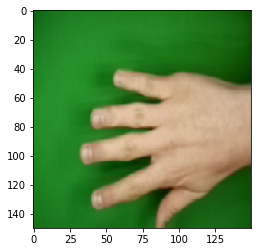

Saving 4VYEe9NSyMlJmXUx.png to 4VYEe9NSyMlJmXUx.png
4VYEe9NSyMlJmXUx.png
rock


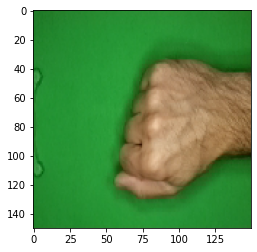

In [34]:
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
# predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
 
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')

# Bagian Baru